## Exploratory Data Analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize

In [2]:
# constants
SATIRE = 1
HOAX = 2
PROPARANDA = 3
RELIABLE_NEWS = 4

In [3]:
with open('raw_data/fulltrain.csv') as file:
    df = pd.read_csv(file, names=['class', 'text'])
    # separate the data into 4 classes based on the first column
    satire_data = df[df['class'] == SATIRE]
    hoax_data = df[df['class'] == HOAX]
    propaganda_data = df[df['class'] == PROPARANDA]
    reliable_news_data = df[df['class'] == RELIABLE_NEWS]
    # plot a histogram for the number of samples in each class
    data = {
        "Satire": len(satire_data),
        "Hoax": len(hoax_data),
        "Propaganda": len(propaganda_data),
        "Reliable News": len(reliable_news_data)
    }

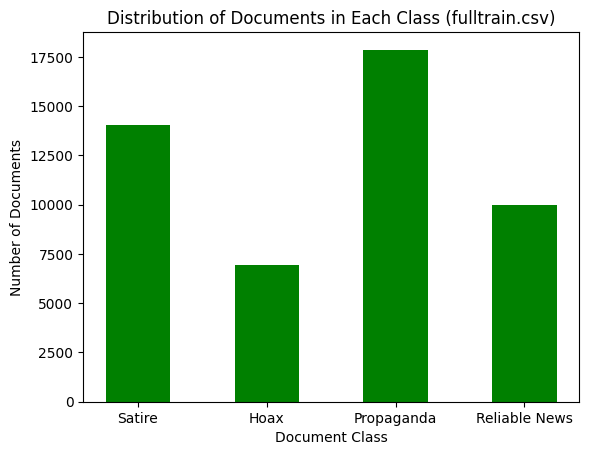

In [21]:
# generate bar plot of the number of samples in each class
plt.bar(data.keys(), data.values(), color='g', width=0.5)
plt.xlabel('Document Class')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents in Each Class (fulltrain.csv)')
plt.savefig('images/data_distribution.png')
plt.show()

In [8]:
# read stop words
with open('raw_data/stopwords_en.txt') as file:
    stop_words = file.read().splitlines()
    print(stop_words)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '/', '*', '&', '%', '#', '@', '!', '~', '+', '-', '�C', '(', ')', '?', ':', '"', "'", '\\', '=', '`', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'bmp', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'com', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'e.g', 'e.g.', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'emp

In [19]:
# create a word cloud for each class
def create_word_cloud(data, title):
    text = ' '.join(data['text'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, stopwords=stop_words)
    wordcloud.generate(text)
    plt.figure(figsize=(10, 5))
    plt.title(title)
    wordcloud.to_file('images/' + title + '.png')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

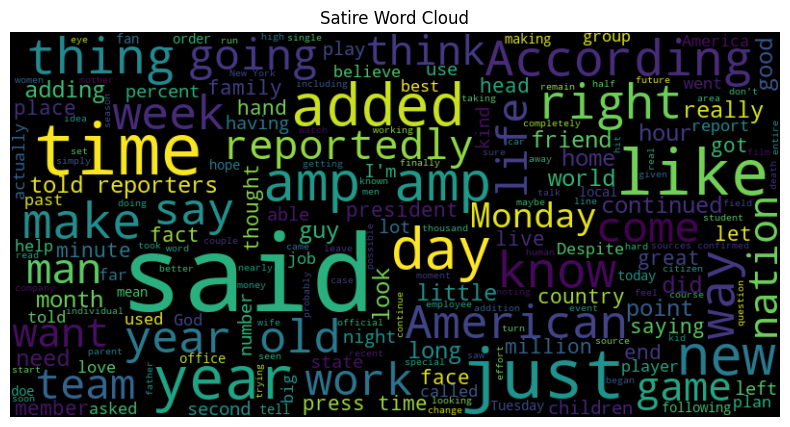

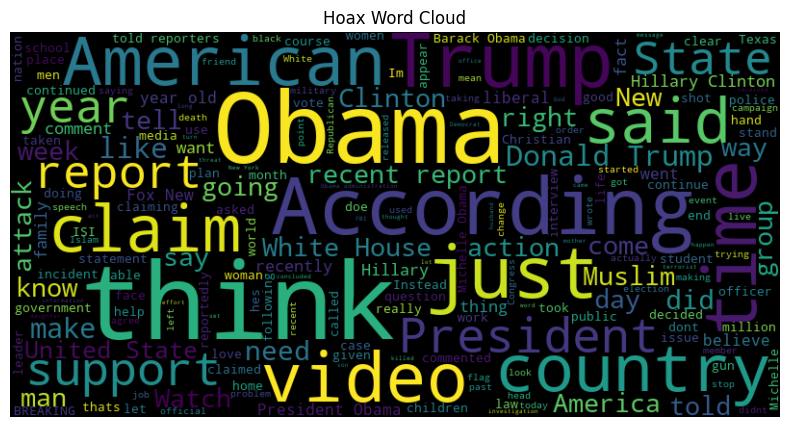

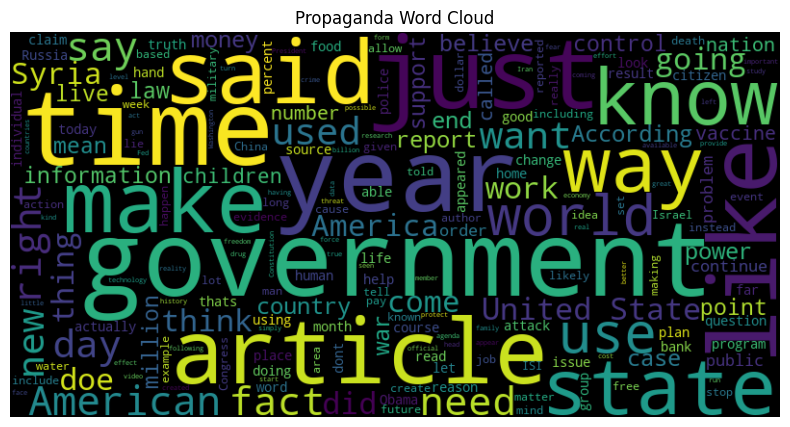

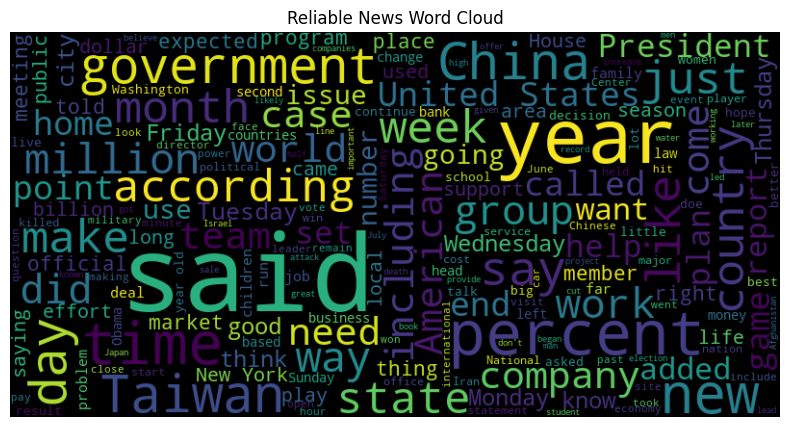

In [20]:
create_word_cloud(satire_data, 'Satire Word Cloud')
create_word_cloud(hoax_data, 'Hoax Word Cloud')
create_word_cloud(propaganda_data, 'Propaganda Word Cloud')
create_word_cloud(reliable_news_data, 'Reliable News Word Cloud')

In [22]:
def get_matches_count(pattern, data):
    return data['text'].str.contains(pattern).sum()

## Hypothesis Testing

In [26]:
def get_words_count(data):
    return data['text'].str.split().str.len().sum()

In [27]:
satire_words_count = get_words_count(satire_data)
hoax_words_count = get_words_count(hoax_data)
propaganda_words_count = get_words_count(propaganda_data)
reliable_news_words_count = get_words_count(reliable_news_data)
print('Word Count:')
print('Satire:', satire_words_count)
print('Hoax:', hoax_words_count)
print('Propaganda:', propaganda_words_count)
print('Reliable News:', reliable_news_words_count)

Word Count:
Satire: 4130288
Hoax: 1350567
Propaganda: 16297591
Reliable News: 4427162


In [30]:
def sentence_count(data):
    return data['text'].apply(sent_tokenize).str.len().sum()

Hypothesis: The relative frequency of decimal numbers is more in reliable news than the rest.

In [28]:
# count the number of decimal numbers in each class
satire_decimal_count = get_matches_count(r'\d+\.\d+', satire_data)
hoax_decimal_count = get_matches_count(r'\d+\.\d+', hoax_data)
propaganda_decimal_count = get_matches_count(r'\d+\.\d+', propaganda_data)
reliable_news_decimal_count = get_matches_count(r'\d+\.\d+', reliable_news_data)
print('Decimal Counts:')
print('Satire:', satire_decimal_count/satire_words_count)
print('Hoax:', hoax_decimal_count/hoax_words_count)
print('Propaganda:', propaganda_decimal_count/propaganda_words_count)
print('Reliable News:', reliable_news_decimal_count/reliable_news_words_count)

Decimal Counts:
Satire: 0.00022250264388342896
Hoax: 0.00017400099365673824
Propaganda: 0.00020322021825188767
Reliable News: 0.0006803455577184661


The above observations confirm our hypothesis.

Hypothesis: The number of question marks is unevenly distributed in the four categories of news. In fact, hoax has the highest proportion of question marks, whereas reliable news has the lowest.

In [31]:
satire_sentence_count = sentence_count(satire_data)
hoax_sentence_count = sentence_count(hoax_data)
propaganda_sentence_count = sentence_count(propaganda_data)
reliable_news_sentence_count = sentence_count(reliable_news_data)
print('Sentence Count:')
print('Satire:', satire_sentence_count)
print('Hoax:', hoax_sentence_count)
print('Propaganda:', propaganda_sentence_count)
print('Reliable News:', reliable_news_sentence_count)


Sentence Count:
Satire: 174961
Hoax: 77329
Propaganda: 821758
Reliable News: 202008


In [32]:
satire_question_count = get_matches_count(r'\?', satire_data)
hoax_question_count = get_matches_count(r'\?', hoax_data)
propaganda_question_count = get_matches_count(r'\?', propaganda_data)
reliable_news_question_count = get_matches_count(r'\?', reliable_news_data)
print('Question Counts:')
print('Satire:', satire_question_count/satire_sentence_count)
print('Hoax:', hoax_question_count/hoax_sentence_count)
print('Propaganda:', propaganda_question_count/propaganda_sentence_count)
print('Reliable News:', reliable_news_question_count/reliable_news_sentence_count)


Question Counts:
Satire: 0.023370922662764845
Hoax: 0.07228853340919965
Propaganda: 0.012737326560860983
Reliable News: 0.007841273612926221


How about relative frequency of exclamations marks?

In [37]:
satire_exclamation_count = get_matches_count(r'!', satire_data)
hoax_exclamation_count = get_matches_count(r'!', hoax_data)
propaganda_exclamation_count = get_matches_count(r'!', propaganda_data)
reliable_news_exclamation_count = get_matches_count(r'!', reliable_news_data)
print('Exclamation Counts:')
print('Satire:', satire_exclamation_count/satire_sentence_count)
print('Hoax:', hoax_exclamation_count/hoax_sentence_count)
print('Propaganda:', propaganda_exclamation_count/propaganda_sentence_count)
print('Reliable News:', reliable_news_exclamation_count/reliable_news_sentence_count)

Exclamation Counts:
Satire: 0.011476843410817268
Hoax: 0.008690142120032588
Propaganda: 0.0072624787346153
Reliable News: 0.0020642746821908043


Reliable news has the LEAST relative frequency of exclamation marks - this should make sense because they don't need to prove they're reliable by using exclamation marks. They have enough evidence to back it up anyway lol.

Hypothesis: Average Sentence Length is more in reliable news than the rest.

In [35]:
satire_average_sentence_length = satire_words_count/satire_sentence_count
hoax_average_sentence_length = hoax_words_count/hoax_sentence_count
propaganda_average_sentence_length = propaganda_words_count/propaganda_sentence_count
reliable_news_average_sentence_length = reliable_news_words_count/reliable_news_sentence_count
print('Average Sentence Length:')
print('Satire:', satire_average_sentence_length)
print('Hoax:', hoax_average_sentence_length)
print('Propaganda:', propaganda_average_sentence_length)
print('Reliable News:', reliable_news_average_sentence_length)

Average Sentence Length:
Satire: 23.606906682060572
Hoax: 17.4652071021221
Propaganda: 19.832591833605512
Reliable News: 21.915775612847018


Hmm looks like there is not much difference in average sentence length... Let's look at average article length instead?

Hypothesis: Average Article Length is a good feature to distinguish between the classes.

In [36]:
satire_average_article_length = satire_words_count/len(satire_data)
hoax_average_article_length = hoax_words_count/len(hoax_data)
propaganda_average_article_length = propaganda_words_count/len(propaganda_data)
reliable_news_average_article_length = reliable_news_words_count/len(reliable_news_data)
print('Average Article Length:')
print('Satire:', satire_average_article_length)
print('Hoax:', hoax_average_article_length)
print('Propaganda:', propaganda_average_article_length)
print('Reliable News:', reliable_news_average_article_length)

Average Article Length:
Satire: 294.03345910158754
Hoax: 194.55012964563525
Propaganda: 912.0084499160604
Reliable News: 442.9376688344172


Okay so hoax articles are much shorter than reliable news and propaganda. In fact, propaganda articles are significantly longer than the rest, which should make sense because their purpose is to spread a message (aka propaganda).